In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR_Analytics/csv/HR_Analytics.csv', delimiter=',', skipinitialspace=True)

# Data Understanding

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
df['major_discipline'].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [ ]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [ ]:
df['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [ ]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [ ]:
df[df['enrolled_university']=='Full time course']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
10,29452,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
14,8722,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,never,26,0.0
32,4324,city_103,0.920,Female,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,24,0.0
40,2547,city_114,0.926,Female,Has relevent experience,Full time course,Masters,STEM,16,1000-4999,Public Sector,2,14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19139,5603,city_21,0.624,NaN,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,NaN,13,0.0
19144,17191,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48,1.0
19145,155,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0


Non terremo in considerazione: enrollee_id, city	

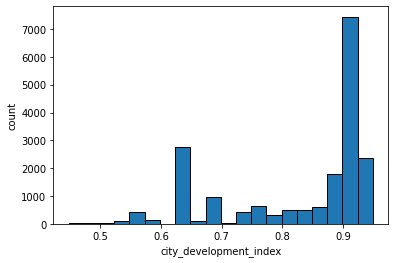

In [ ]:
plt.hist(df['city_development_index'], bins=20, edgecolor='black')
plt.xlabel('city_development_index')
plt.ylabel('count')
plt.show()

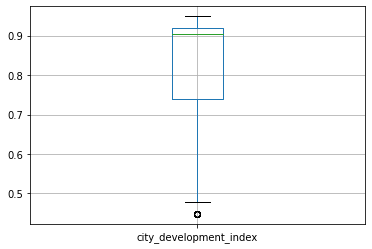

In [ ]:
df.boxplot(column=['city_development_index'])
plt.show()

In [ ]:
a=np.array([df['city_development_index'].value_counts().index, df['city_development_index'].value_counts()])
a.sort(axis=1)
a
#pensare se togliere questo outlier

array([[4.480e-01, 4.790e-01, 4.870e-01, 4.930e-01, 5.120e-01, 5.160e-01,
        5.180e-01, 5.270e-01, 5.500e-01, 5.550e-01, 5.560e-01, 5.580e-01,
        5.630e-01, 5.790e-01, 6.240e-01, 6.250e-01, 6.400e-01, 6.450e-01,
        6.470e-01, 6.490e-01, 6.640e-01, 6.660e-01, 6.800e-01, 6.820e-01,
        6.890e-01, 6.910e-01, 6.930e-01, 6.980e-01, 7.010e-01, 7.220e-01,
        7.250e-01, 7.270e-01, 7.300e-01, 7.350e-01, 7.380e-01, 7.390e-01,
        7.400e-01, 7.420e-01, 7.430e-01, 7.450e-01, 7.540e-01, 7.620e-01,
        7.630e-01, 7.640e-01, 7.660e-01, 7.670e-01, 7.690e-01, 7.750e-01,
        7.760e-01, 7.800e-01, 7.810e-01, 7.880e-01, 7.890e-01, 7.940e-01,
        7.950e-01, 7.960e-01, 8.020e-01, 8.040e-01, 8.070e-01, 8.240e-01,
        8.270e-01, 8.300e-01, 8.360e-01, 8.400e-01, 8.430e-01, 8.470e-01,
        8.480e-01, 8.550e-01, 8.560e-01, 8.650e-01, 8.660e-01, 8.780e-01,
        8.840e-01, 8.870e-01, 8.900e-01, 8.930e-01, 8.950e-01, 8.960e-01,
        8.970e-01, 8.980e-01, 8.990e-0

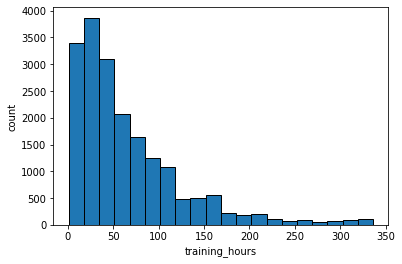

In [ ]:
plt.hist(df['training_hours'], bins=20,edgecolor='black')
plt.xlabel('training_hours')
plt.ylabel('count')
plt.show()

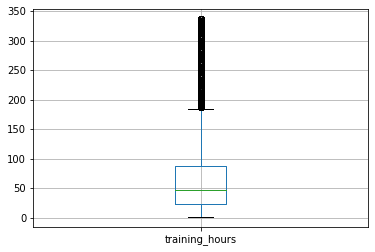

In [ ]:
df.boxplot(column=['training_hours'])
plt.show()

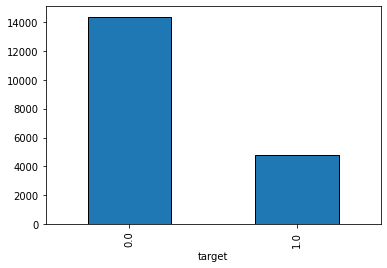

In [ ]:
df['target'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('target')
plt.show()

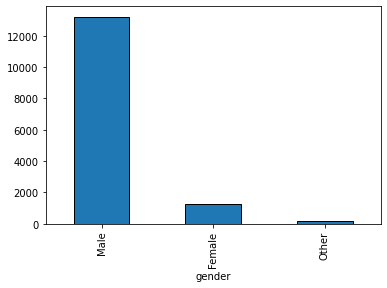

In [ ]:
df['gender'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('gender')
plt.show()

In [ ]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

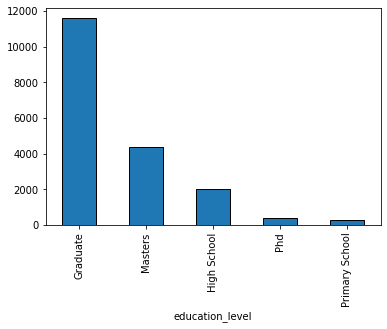

In [ ]:
df['education_level'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('education_level')
plt.show()

In [ ]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

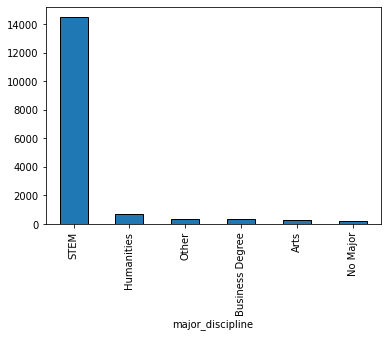

In [ ]:
df['major_discipline'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('major_discipline')
plt.show()

In [ ]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [ ]:
df['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

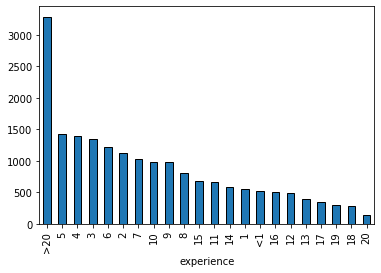

In [ ]:
df['experience'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('experience')
plt.show()  #da migliorare prossimamente

In [ ]:
a=np.array(df['experience'].value_counts().index)
a.sort()
a

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '3', '4', '5', '6', '7', '8', '9', '<1', '>20'],
      dtype=object)

In [ ]:
x = a[0:-2].astype(np.int)
x.sort()
x=x.astype(np.str)
x

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'], dtype='<U21')

In [ ]:
x=np.append(x,a[-1])
x=np.insert(x,0,a[-2])
x

array(['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20'],
      dtype='<U21')

In [ ]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

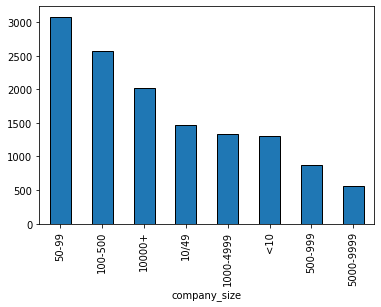

In [ ]:
df['company_size'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('company_size')
plt.show()  #da vedere meglio l'ordinamento (abbiamo scoperto che esiste un oggetto intervallo può ritornare utile)

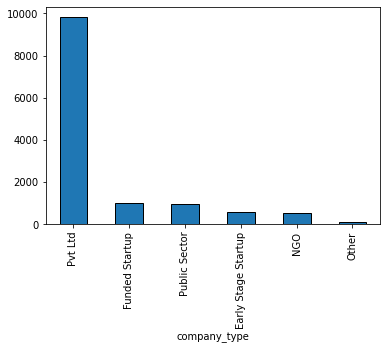

In [ ]:
df['company_type'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('company_type')
plt.show()

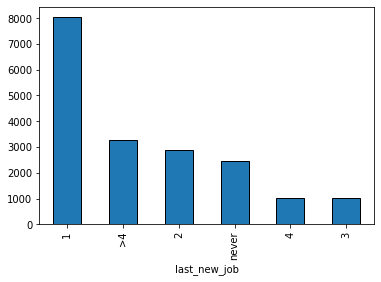

In [ ]:
df['last_new_job'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('last_new_job')
plt.show()

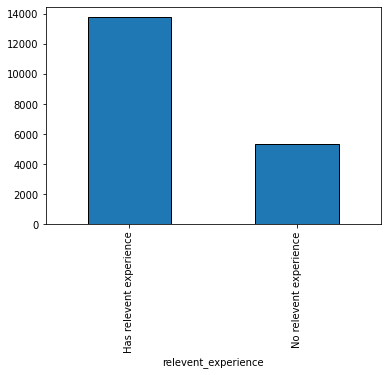

In [ ]:
df['relevent_experience'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('relevent_experience')
plt.show()

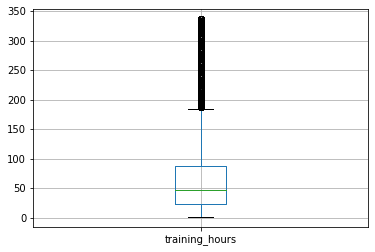

In [ ]:
df.boxplot(column=['training_hours'])
plt.show()

# Data Preparation

In [ ]:
df_und = df.copy()

In [ ]:
df_und.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
columns = ['gender', 'enrolled_university', 'education_level',
       'major_discipline', 'company_size', 'company_type', 'last_new_job']
for col in columns:
  fill1 = df_und[col].value_counts(normalize=True)
  missing1 = df_und[col].isnull()
  df_und.loc[missing1, col] = np.random.choice(fill1.index, size=len(df[missing1]),p=fill1.values)  

In [ ]:
df_und.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,10000+,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df_und['experience'] = df_und['experience'].fillna(df_und['experience'].mode()[0])
df_und['experience'].isna().sum()

0

In [ ]:
indices = df_und.loc[df_und['education_level'].isin(['Primary School', 'High School'])]['major_discipline'].index
df_und.loc[indices, 'major_discipline'] = ['No Discipline' for x in range(len(indices))]

In [ ]:
df_und.loc[df_und['education_level'].isin(['Primary School', 'High School'])]['major_discipline']

6        No Discipline
10       No Discipline
14       No Discipline
25       No Discipline
28       No Discipline
             ...      
19134    No Discipline
19140    No Discipline
19142    No Discipline
19156    No Discipline
19157    No Discipline
Name: major_discipline, Length: 2375, dtype: object

In [ ]:
df_und['major_discipline'].value_counts()

STEM               14882
No Discipline       2375
Humanities           685
Other                390
Business Degree      336
Arts                 261
No Major             229
Name: major_discipline, dtype: int64

In [ ]:
df_und['education_level'].value_counts()

Graduate          11882
Masters            4478
High School        2063
Phd                 423
Primary School      312
Name: education_level, dtype: int64

In [ ]:
2063 + 312

2375

In [ ]:
df_und.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
df_und.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
#Questa sarebbe la modifica da apportare in modo diretto, però avrebbe cambiato il modo in cui i nan erano già stati rimpiazzati nel fie csv
#quindi ho importato direttamente di nuovo il file csv e ho agito su quello, mettendo a tutti i primary e high school No Discipline nel campo major_discipline

In [ ]:
df_und = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR_Analytics/HR_Analytics_Data_Understanding.csv', delimiter=',', skipinitialspace=True)

In [ ]:
df_und.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,500-999,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df_und.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
indices = df_und.loc[df_und['education_level'].isin(['Primary School', 'High School'])]['major_discipline'].index
df_und.loc[indices, 'major_discipline'] = ['No Discipline' for x in range(len(indices))]

In [ ]:
df_und.loc[df_und['education_level'].isin(['Primary School', 'High School'])]['major_discipline'].unique()

array(['No Discipline'], dtype=object)

In [ ]:
#Rimpiazzo i missing values di last_new_job seguendo la distribuzione e non la moda
col = 'last_new_job'
fill1 = df[col].value_counts(normalize=True)
missing1 = df[col].isnull()
df_und.loc[missing1, col] = np.random.choice(fill1.index, size=len(df[missing1]),p=fill1.values)

In [ ]:
fill1

1        0.429143
>4       0.175607
2        0.154790
never    0.130878
4        0.054924
3        0.054657
Name: last_new_job, dtype: float64

In [ ]:
missing1.value_counts()

False    18735
True       423
Name: last_new_job, dtype: int64

In [ ]:
#prima era rimpiazzato così con la moda
df_und.loc[missing1, col]

58       1
64       1
90       1
135      1
180      1
        ..
18944    1
19043    1
19106    1
19113    1
19139    1
Name: last_new_job, Length: 423, dtype: object

In [ ]:
#ora è rimpiazzato così:
df_und.loc[missing1, col]

58        1
64       >4
90        1
135       1
180       1
         ..
18944     1
19043     1
19106     4
19113     1
19139     2
Name: last_new_job, Length: 423, dtype: object

In [ ]:
#salvo il nuovo csv nella cartella csv
df_und.to_csv('/content/drive/MyDrive/Colab Notebooks/HR_Analytics/csv/HR_Analytics_Data_Understanding.csv', index=False)

In [ ]:
df['company_type'].value_counts(normalize=True)

Pvt Ltd                0.754110
Funded Startup         0.076894
Public Sector          0.073360
Early Stage Startup    0.046320
NGO                    0.040022
Other                  0.009295
Name: company_type, dtype: float64

In [ ]:
df_und['company_type'].value_counts(normalize=True)

Pvt Ltd                0.752688
Funded Startup         0.076522
Public Sector          0.074486
Early Stage Startup    0.046560
NGO                    0.040140
Other                  0.009604
Name: company_type, dtype: float64

In [ ]:
df_und [['city_development_index', 'training_hours']].corr()

,city_development_index,training_hours
city_development_index,1.00000,0.00192
training_hours,0.00192,1.00000


In [ ]:
#df_und.to_csv('/content/drive/MyDrive/Colab Notebooks/HR_Analytics/HR_Analytics_Data_Understanding.csv', index=False)